## Numerically Solving PDEs

This package contains methods for numerically solving 2nd order diffusive PDEs. Examples of this are contained within this notebook.

You must first run the code block below to allow imports from the rest of this package.

In [2]:
from os import sys
sys.path.append("..")

### Solving Homogeneous PDEs with Homogeneous Boundary Conditions

There are three methods implemented for numerically solving PDEs. They are the Forward Euler, Backwards Euler and the Crank-Nicholson methods.
They can be used to solve PDEs with the form

$\frac{\partial u}{\partial t} = \kappa \frac{\partial^{2} u}{\partial x^{2}}$,

where $\kappa$ is the diffusion coefficient. The solver will solve the PDE in the space interval $[0,L]$. Initially, we will apply homogeneous Dirichlet boundary conditions, 

$u(0,t) = u(L,t) = 0$.

In [3]:
from pde_solvers import solve_pde
import numpy as np

L = 1   # length of spatial dimension
T = 0.5     # time to solve until
mx = 100    # spatial resolution
mt = 1000   # temporal resolution

def homo_BC(x,t):
    '''
    Function containing the homogeneous BCs, always returns 0.
    Note, it must take 2 arguments, x and t.
    '''
    return 0

def IC(x, L):
    '''
    Function containing the initial conditions for the PDE.
    Must take 2 arguments, x and L.
    '''
    y = (np.sin(np.pi*x/L))
    return y

# Call the pde solver function, using the Forward Euler method
u, t = solve_pde(L, T, mx, mt, 'dirichlet', homo_BC, IC, solver='feuler', kappa = lambda x:x/(x*10))

C:\Users\chris\AppData\Local\Temp\ipykernel_12716\4137306564.py:25: RuntimeWarning: invalid value encountered in true_divide
  u, t = solve_pde(L, T, mx, mt, 'dirichlet', homo_BC, IC, solver='feuler', kappa = lambda x:x/(x*10))


The solve_pde function returns an array, u, where the rows correspond to the spatial dimension and the columns to each time value returned in the other array, t.

This package contains some functions that can be used to plot the solutions, either as a 2D plot, showing the spatial and temporal dimensions, a slice of the solution at a specific time or as an animation showing how the solution evolves in time. The specific time plot can be used to show a comparison with the analytical solution, if one exists.

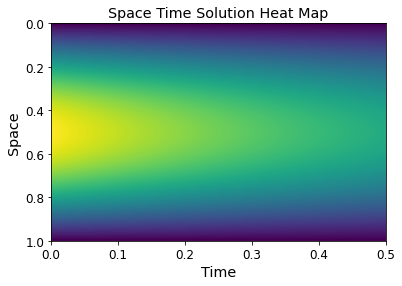

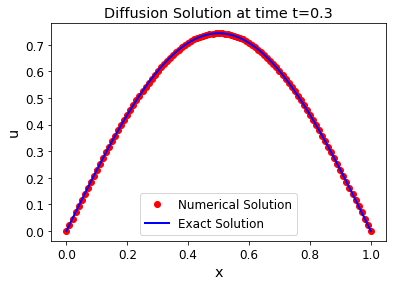

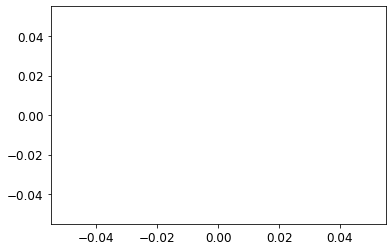

In [4]:
from plots import plot_pde_space_time_solution, plot_pde_specific_time, animate_solution

def u_exact(x,t, kappa, L):
    '''
    The exact solution to the PDE defined above.
    '''
    y = np.exp(-kappa*(np.pi**2/L**2)*t)*np.sin(np.pi*x/L)
    return y

# PLot heatmap
plot_pde_space_time_solution(u, L, T, 'Space Time Solution Heat Map') # plot the 2D heatmap

# Plot specific time solution
exact_solution = u_exact(np.linspace(0,L,mx+1), 0.3, 0.1, L)
plot_pde_specific_time(u, t, 0.3, L, 'Diffusion Solution', exact_solution) # plot the slice at t=0.3

# Create and show animation - this does not work in this notebook.
animate_solution(u,t,L)

The same approach can be used to solve the same PDE with homogeneous Neumann boundary conditions,

$\frac{\partial u(0,t)}{\partial x} = \frac{\partial u(L,t)}{\partial x} = 0$.

This time, the backwards Euler method will be used.

C:\Users\chris\AppData\Local\Temp\ipykernel_12716\3062032135.py:2: RuntimeWarning: invalid value encountered in true_divide
  u, t = solve_pde(L, T, mx, mt, 'neumann', homo_BC, IC, solver='beuler', kappa = lambda x:x/(x*10))


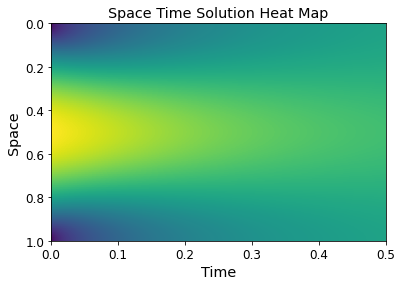

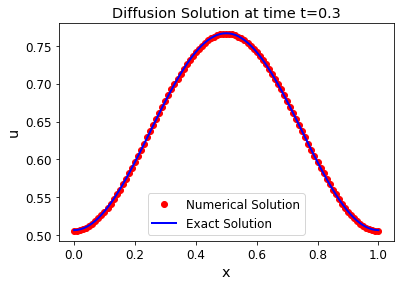

In [5]:
# Call the pde solver function, using the backwards Euler method
u, t = solve_pde(L, T, mx, mt, 'neumann', homo_BC, IC, solver='beuler', kappa = lambda x:x/(x*10))

def u_exact_nhomo(x,t,kappa,L=1):
    '''
    The exact solution for the homogeneous Neumann BC case for the homogeneous diffusion equation.
    '''
    y = (2/np.pi) - (4/(3*np.pi))*np.cos(2*np.pi*x)*(np.e**(-4*(np.pi**2) * kappa * t)) 
    - (4/(15*np.pi))*np.cos(4*np.pi*x)*(np.e**(-16*(np.pi**2) * kappa * t))
    return y

plot_pde_space_time_solution(u, L, T, 'Space Time Solution Heat Map') # plot the 2D heatmap

exact_solution = u_exact_nhomo(np.linspace(0,L,mx+1), 0.3, 0.1, L)
plot_pde_specific_time(u, t, 0.3, L, 'Diffusion Solution', exact_solution) # plot the slice at t=0.3

The same approach can be used to solve the same PDE with homogeneous Robin boundary conditions,

$\alpha(t)u(0,t) + \beta(t)\frac{\partial u(0,t)}{\partial x} = \alpha(t)u(L,t) + \beta(t)\frac{\partial u(L,t)}{\partial x} = 0$.

In this case, the homogeneous Robin boundary conditions will behave the same as the homogeneous Neumann case.

This time, the Crank-Nicholson method will be used.

C:\Users\chris\AppData\Local\Temp\ipykernel_12716\2150791297.py:22: RuntimeWarning: invalid value encountered in true_divide
  u, t = solve_pde(L, T, mx, mt, 'robin', robin_BC, IC, solver='feuler', kappa = lambda x:x/(x*10))


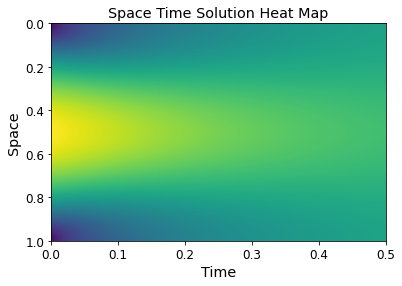

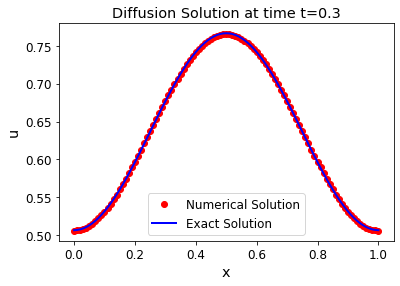

In [6]:
def robin_BC(x, t):
    '''
    Function containing the Robin boundary condition.
    When using Robin boundary conditions the BC function must return alpha, the effect of the dirichlet
    condition as well as gamma, the total effect at the boundary.
    '''
    # Effect of dirichlet
    alpha = lambda t : 1
    # Effect of neumann
    beta = lambda t : 1

    # The dirichlet and neumann effects on the boundary
    dirichlet_u = lambda x,t : 0
    neumann_u = lambda x,t : 0

    # Combination of all effects
    gamma = alpha(t)*dirichlet_u(x,t) + beta(t)*neumann_u(x,t)

    return gamma, alpha(t)

# Call the pde solver function, using the Crank-Nicholson method
u, t = solve_pde(L, T, mx, mt, 'robin', robin_BC, IC, solver='feuler', kappa = lambda x:x/(x*10))

plot_pde_space_time_solution(u, L, T, 'Space Time Solution Heat Map') # plot the 2D heatmap

exact_solution = u_exact_nhomo(np.linspace(0,L,mx+1), 0.3, 0.1, L)
plot_pde_specific_time(u, t, 0.3, L, 'Diffusion Solution', exact_solution) # plot the slice at t=0.3

### Solving Homogeneous PDEs with Non-Homogeneous Boundary Conditions

Using the same framework as in the previous examples, it is also possible to solve PDEs with non-homogeneous boundary conditions.
All three solvers and all three types of boundary conditions are supported.

Thhis example uses the same homogeneous PDE,

$\frac{\partial u}{\partial t} = \kappa \frac{\partial^{2} u}{\partial x^{2}}$,

subject to dirichlet boundary conditions,

$u(0,t) = 20,  \,\, u(L,t) = 50$,

and with initial conditions,

$u(x,0) = 0$

in the domain $[0, 1]$.

C:\Users\chris\AppData\Local\Temp\ipykernel_12716\2884200166.py:33: RuntimeWarning: invalid value encountered in true_divide
  u, t = solve_pde(L, T, mx, mt, 'dirichlet', non_homo_BC, IC, solver='cn', kappa = lambda x:x/(x*10))


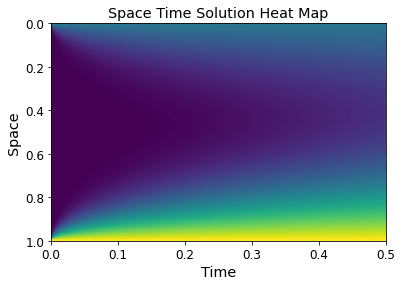

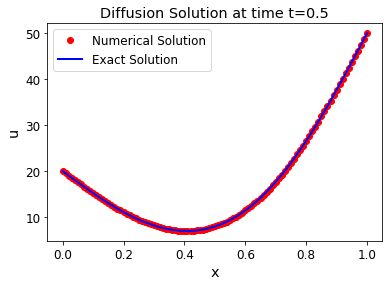

In [7]:
def IC(x, L):
    '''
    Function containing the initial conditions as described above.
    '''
    return 0

def non_homo_BC(x, t):
    '''
    Function containing the boundary condition described above.
    Note how different boundary conditions can be applied at each end of the domain using if statements.
    '''
    if x==0:
        return 20
    else:
        return 50

def u_exact_dnonhomo(x,t,kappa,L):
    '''
    The exact solution for the non-homogeneous dirichlet BC case described above.
    '''
    sum = 0
    for n in range(100):
        n+=1
        sum += ((100*((-1)**n) - 40) / (n*np.pi)) * (np.e**(-1*kappa*(n**2)*(np.pi**2)*t)) * np.sin(n*np.pi*x)

    y = 20 + (30*x) + sum
    return y

# Get the exact solution
exact_sol_dnonhomo = u_exact_dnonhomo(np.linspace(0, L, mx+1), T, 0.1, L)

# Call the pde solver function, using the Crank-Nicholson method
u, t = solve_pde(L, T, mx, mt, 'dirichlet', non_homo_BC, IC, solver='cn', kappa = lambda x:x/(x*10))

plot_pde_space_time_solution(u, L, T, 'Space Time Solution Heat Map') # plot the 2D heatmap

plot_pde_specific_time(u, t, T, L, 'Diffusion Solution', exact_sol_dnonhomo) # plot the slice at t=0.3

### Periodic Boundary Conditions

It is also possible to solve PDEs with periodic boundary conditions.

For example, the PDE,

$\frac{\partial u}{\partial t} = \kappa \frac{\partial^{2} u}{\partial x^{2}}$,

where $\kappa = 1$,

subject to periodic boundary conditions,

$u(0,t) = u(L,t)$, $\frac{\partial u(0,t)}{\partial x} = \frac{\partial u(L,t)}{\partial x}$. for all $t$,

and with initial conditions,

$u(x,0) = x+2$

in the domain $[0, 1]$.

C:\Users\chris\anaconda3\envs\SciVenv\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


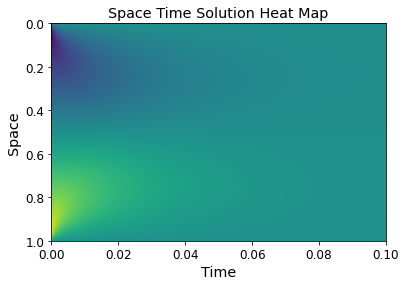

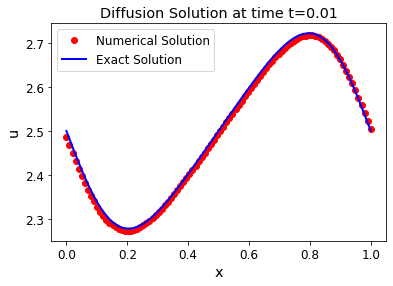

In [8]:
def homo_BC(x,t):
    '''
    Function containing the homogeneous boundary conditions.
    '''
    return 0

def IC(x, L):
    '''
    The initial conditions for the PDE
    '''
    return x+2

def exact_sol(xx, t_plot):
    # Exact solution
    sol = 5/2
    sum=0
    for n in range(100):
        n+= 1
        sum += (np.sin(2*n*np.pi*xx)*(np.e**((-4*(np.pi**2) * (n**2) * t_plot))))/(n*np.pi)
    sol = sol - sum
    return sol

u_exact = exact_sol(np.linspace(0,L,mx), 0.01)

u,t = solve_pde(L, 0.1, mx, mt, 'periodic', homo_BC, IC, solver='beuler', kappa = lambda x:np.ones(len(x)))

plot_pde_space_time_solution(u, L, 0.1, 'Space Time Solution Heat Map')

plot_pde_specific_time(u, t, 0.01, L, 'Diffusion Solution', u_exact) # plot the slice at t=0.5

### Variable Diffusion Coefficient

It is also possible to define a problem where the diffusion coefficient can vary in space.

The PDE becomes,

$\frac{\partial u}{\partial t} = \kappa (x) \frac{\partial^{2} u}{\partial x^{2}}$,

where $\kappa(x) = x^2$ and the PDE is subject to the following boundary conditions,

$\frac{\partial u(0,t)}{\partial x}  = 0$,

$hu(1,t) + \frac{\partial u(1,t)}{\partial x} = 0$,

with initial conditions,

$u(x,0) = sin(\pi x)$.

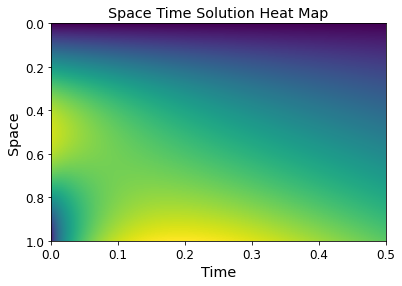

In [9]:
def robin_BC(x, t):
    h = 1
    if x == 0:
        # Effect of dirichlet
        alpha = lambda t : 0
        # Effect of neumann
        beta = lambda t : 1

        # The dirichlet and neumann effects on the boundary
        dirichlet_u = lambda x,t : 0
        neumann_u = lambda x,t : 0

        # Combination of all effects
        gamma = alpha(t)*dirichlet_u(x,t) + beta(t)*neumann_u(x,t)

    if x == L:
        # Effect of dirichlet
        alpha = lambda t : h
        # Effect of neumann
        beta = lambda t : 1

        # The dirichlet and neumann effects on the boundary
        dirichlet_u = lambda x,t : 0
        neumann_u = lambda x,t : 0

        # Combination of all effects
        gamma = alpha(t)*dirichlet_u(x,t) + beta(t)*neumann_u(x,t)

    return gamma, alpha(t)

def IC(x,L):
    return np.sin(np.pi*x)

# Call the pde solver function, using the Crank-Nicholson method
u, t = solve_pde(L, T, mx, mt, 'robin', robin_BC, IC, solver='cn', kappa = lambda x:x**2) # note the kappa function returning x^2

plot_pde_space_time_solution(u, L, T, 'Space Time Solution Heat Map') # plot the 2D heatmap

### Non Homogeneous RHS Function

It is also possible to solve PDEs with a non-homogeneous RHS function that can be either linear or non-linear.

PDEs of this form can be solved using any of the included solvers, however, the Forward Euler method must be used with care since it is conditionally unstable.
Below is an example of a linear RHS function $F(x,t) = x$, such that the PDE is

$\frac{\partial u}{\partial t} = \kappa \frac{\partial^{2} u}{\partial x^{2}} + x$,

subject to homogeneous dirichlet boundary conditions, $u(0,t) = 0$, $u(L,t) = 0$,

in the domain $[0,1]$ and with initial conditions $u(x,0)=1$.

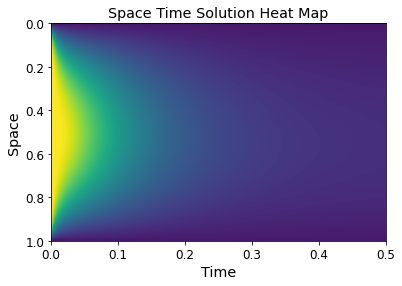

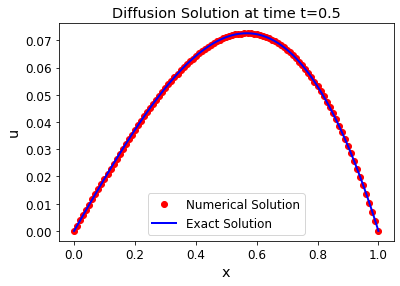

In [10]:
def homo_BC(x,t):
    '''
    Function containing the homogeneous boundary conditions.
    '''
    return 0

def IC(x, L):
    '''
    The initial conditions for the PDE
    '''
    return 1

def RHS_f(x, t):
    '''
    The linear RHS function
    '''
    return x

def exact_sol(xx, t_plot, kappa=1, beta = 1):
    # Exact solution for linear problem
    sum = 0
    for n in range(100):
        n+=1
        sum += ((np.sin(n*np.pi*xx)*np.e**(-1*(np.pi**2)*(n**2)*t_plot))*(((-1)**n)*(n**2)*(np.pi**2) -  (n**2)*(np.pi**2) - ((-1)**n)))/((n**3)*(np.pi**3))
    sol = -2*sum - ((xx**3)/(6)) + ((xx)/(6))
    return sol

u_exact = exact_sol(np.linspace(0,L,mx+1), 0.5)

u,t = solve_pde(L, T, mx, mt, 'dirichlet', homo_BC, IC, solver='cn', RHS = RHS_f, kappa = lambda x:np.ones(len(x)), linearity='linear')

plot_pde_space_time_solution(u, L, T, 'Space Time Solution Heat Map')

plot_pde_specific_time(u, t, 0.5, L, 'Diffusion Solution', u_exact)

Below is an example of a non-linear RHS function $F(u, x,t) = u$, such that the PDE is

$\frac{\partial u}{\partial t} = \kappa \frac{\partial^{2} u}{\partial x^{2}} + u$,

subject to homogeneous dirichlet boundary conditions, $u(0,t) = 0$, $u(L,t) = 0$,

in the domain $[0,1]$ and with initial conditions $u(x,0)=1$.

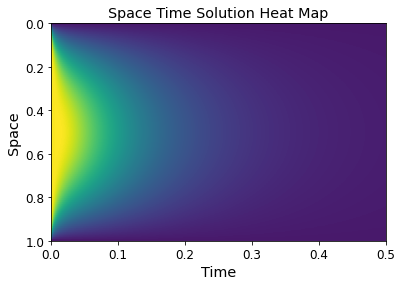

C:\Users\chris\anaconda3\envs\SciVenv\lib\site-packages\matplotlib\animation.py:889: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you have outputted the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


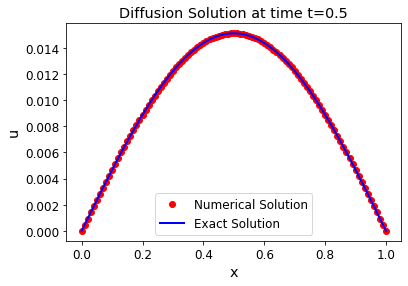

In [11]:
def homo_BC(x,t):
    '''
    Function containing the homogeneous boundary conditions.
    '''
    return 0

def IC(x, t):
    '''
    The initial conditions for the PDE
    '''
    return 1

def RHS_f(u, x, t):
    '''
    The nonlinear RHS function
    '''
    return u

def exact_sol(xx, t_plot):
    # Exact solution for non-linear problem
    sum = 0
    for n in range(100):
        n+=1
        sum += ((-2*np.sin(n*np.pi*xx)*np.e**(-t_plot*(np.pi*n +1)*(np.pi*n - 1))*(((-1)**n) -1)))/(n*np.pi)
    sol = sum
    return sol

u_exact = exact_sol(np.linspace(0,L,mx+1), 0.5)

u,t = solve_pde(L, T, mx, mt, 'dirichlet', homo_BC, IC, solver='cn', RHS = RHS_f, kappa = lambda x:np.ones(len(x)), linearity='nonlinear')

plot_pde_space_time_solution(u, L, T, 'Space Time Solution Heat Map')

plot_pde_specific_time(u, t, 0.5, L, 'Diffusion Solution', u_exact)